In [1]:
# Below code loads napari to notebook for screenshot purposes
# All functions done on the viewer window3
import warnings

import matplotlib.pyplot as plt
import napari
from IPython import get_ipython
from loguru import logger


class ScreenshotContext:
    def __enter__(self):
        get_ipython().run_line_magic("matplotlib", "inline")

    def __exit__(self, exc_type, exc_value, traceback):
        get_ipython().run_line_magic("matplotlib", "qt")


plt.rcParams["figure.figsize"] = (20, 20)
warnings.filterwarnings("ignore")
logger.remove()

# Getting started
The two main options for installing `PRISM` are:
1. Directly as a python package hosted on [pypi](https://pypi.org/), or directly from the [Github repository](https://github.com/clinicalomx/tmaprocessor_prerelease)
   
2. Within the [napari](https://napari.org/) application as a plugin hosted on [napari-hub](https://www.napari-hub.org/) (later transitioning to a community-run implementation)

## Installation

### via pip installation
Install via pypi: 
    ```pip install napari-prism```

Install via github by cloning and installing the repository locally:
1) `git clone https://github.com/clinicalomx/napari-prism`
2) Change to the directory of the cloned repo
3) `pip install .`

### via napari-hub
0. If napari is not installed in an environment see the following [guide](https://napari.org/dev/tutorials/fundamentals/installation.html). Currently, the package only supports napari versions <=0.4.19.post1.

1. Open the napari application i.e. by running: `python -m napari`

2. In the application toolbar, navigate `Plugins` > `Install/Uninstall Plugins...` 

3. In the `Plugin Manager` search for `napari-prism`, and click `Install`. 

## Opening the napari application
From the command line / terminal: `python -m napari`

From a jupyter notebook cell:

In [2]:
viewer = napari.Viewer()

## Usage and entry points
Designed as a modular package, there are multiple ways to launch and use `PRISM`, depending on the initial input.

As an example, we use a previously published and analysed dataset from [Monkman et al. (2024)](https://doi.org/10.1186/s12967-024-05035-8), which is a FFPE tissue microarray of samples from a Non-Small Cell Lung Cancer (NSCLC4301) cohort, imaged through the Akoya Phenocycler™-Fusion platform at 36-plex. 

### Starting from raw image files (.qptiff)
0. Open the napari application
1. Navigate the file menu: `File` > `Open with Plugin` > `Open Files(s)...`
2. Select the .qptiff image file > `Open`

![alt](../_static/notebook_images/open_file_with_plugin.png) | ![alt](../_static/notebook_images/open_qptiff.png)

4. In `Choose reader`, ensure `napari napari-prism` is selected > `Ok`

<p align="center">
  <img src="../_static/notebook_images/choose_reader.png" />
</p>


This creates a barebones {class}`spatialdata.SpatialData` object saved to disk as a .zarr store containing the sole raw image stored in a multiscale/pyramidal format.


The SpatialData object is saved to disk to the same directory as a .zarr file. 

Note that this process make take awhile depending on the size of the image.

Once complete, the SpatialData (.zarr file) will be imported in the viewer as per steps below.


### Starting from on-disk SpatialData objects (.zarr)
If importing from a .qptiff file, the below steps will be done automatically.

If importing from a .zarr file: 
1. Navigate `File` > `Open with Plugin` > `Open Folder...`
2. Select the .zarr **folder** > `Open` (don't select any of its child folders like the images or tables folder)


![alt](../_static/notebook_images/open_folder_with_plugin.png) | ![alt](../_static/notebook_images/open_zarr.png)

3. In `Choose reader`, select `napari napari-prism` > `Ok`

<p align="center">
  <img src="../_static/notebook_images/choose_zarr_reader.png" />
</p>


Launching the .zarr folder with `napari-prism` does two things:
1. It launches napari-spatialdata plugins. It launches a base widget (bottom left) which the user selects SpatialData elements to add as layers, the `View` plugin to visualise attributes of those elements, and the `Scatter` plugin to visualise `AnnData` attributes.
2. It launches the `napari-prism` widgets, containing the `TMA Image Analysis` and `AnnData Analysis` (covered in the next two notebooks).

These widgets will be organised in tabs (bottom right).

The window will look something like this:

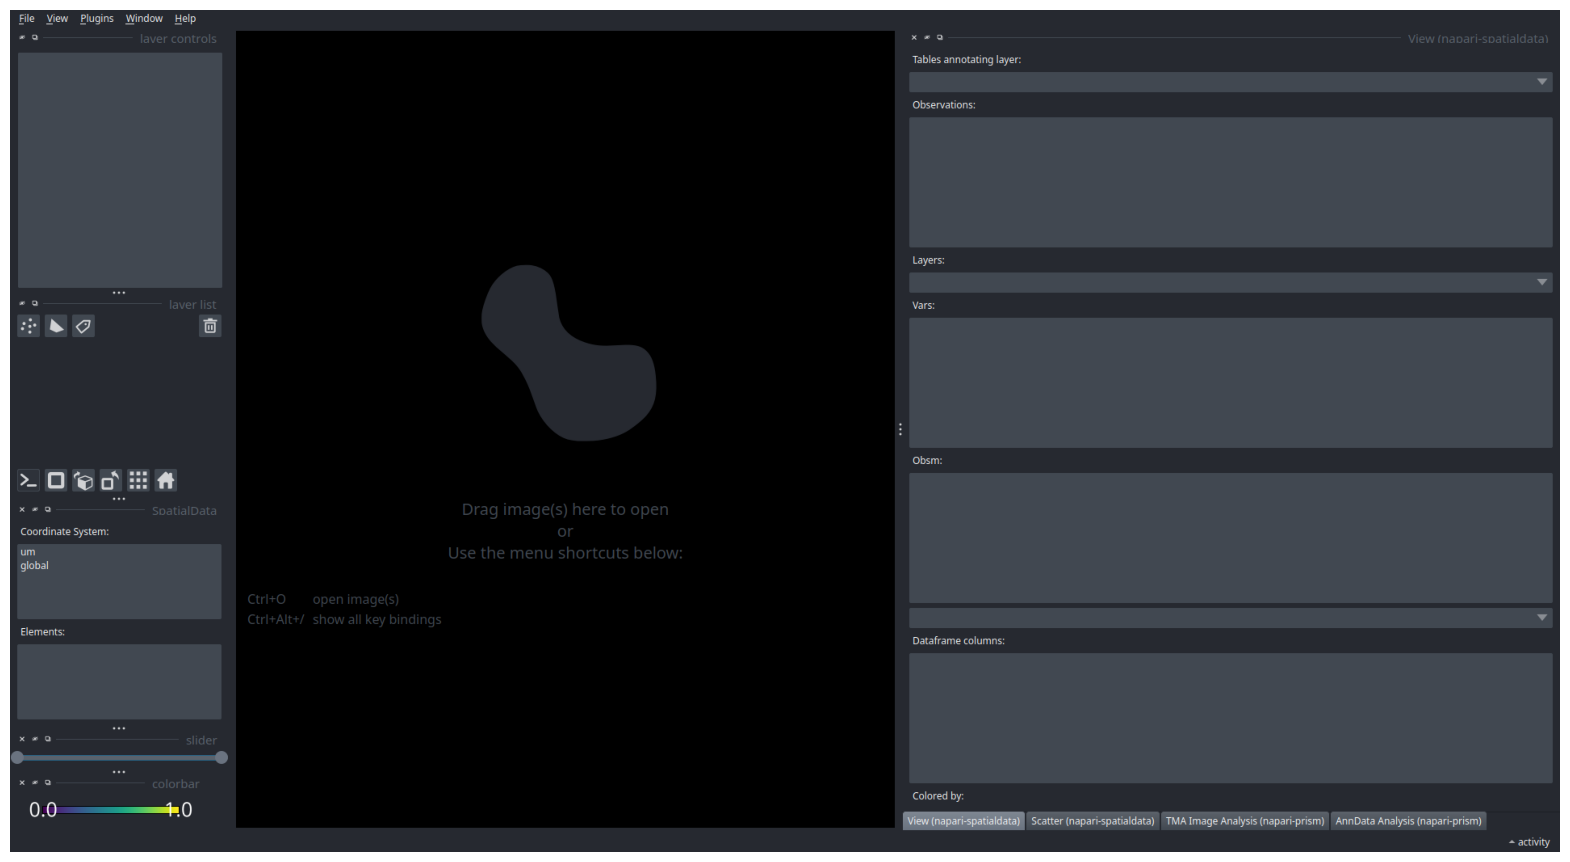

In [14]:
with ScreenshotContext():
    plt.imshow(viewer.screenshot(canvas_only=False))
    plt.axis("off")
    plt.show()

The user can use the `SpatialData Elements` (bottom left) and `View (napari-spatialdata)` widgets (tab on the bottom right) to visualise components of the SpatialData object. 

For example, they can visualise the loaded and parsed .qptiff image 
1. Select the `global` (pixels) coordinate system
2. Select and double-click the raw .qptiff image `NSCLC430` that appears in `Elements:`
3. Visualise a channel of choice by double clicking the `Vars` element, i.e.) `DAPI`

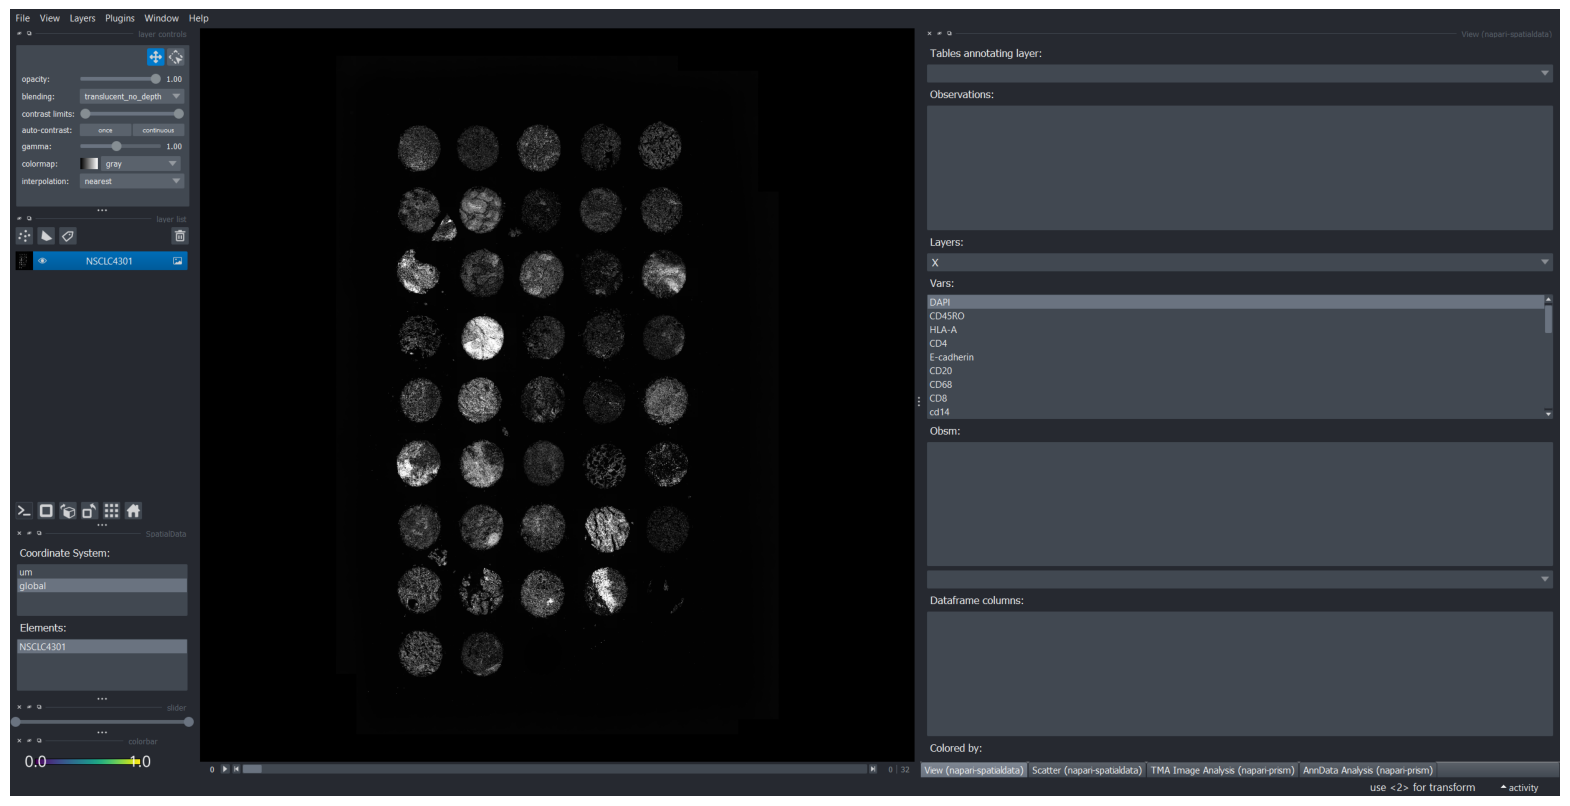

In [3]:
with ScreenshotContext():
    plt.imshow(viewer.screenshot(canvas_only=False))
    plt.axis("off")
    plt.show()

We also provide a way to visualise channels as multiple colors:

1. Select the channel vars to view in the `View (napari-spatialdata widget)`
2. Select the original image layer `NSCLSC4301`. Make this invisible by clicking the eye symbol of this layer.
3. Select the `TMA Image Analysis (napari-prism)` widget tab in the bottom right
4. Select the `Utils` tab at the top of this widget
5. Click `Add current view as standalone`
6. Click the `NSCLC View: (channel)` layer in the layer list on the left
7. Change the image properties using the layer controls on the top right:
- Opacity: Transparency of the image
- Contrast limits: Slider to threshold image intensities to a lower (first circle) and upper (second circle) bound
- Gamma: Visualised 'brightness' shown on the monitory to the user. Decrease to make brighter.
- Colormap: Change this to color intensity by color

1. Repeat steps 1-7 for every channel(s) you wish to visualise

As an example, we visualise:
- DAPI in blue
- E-cadherin in green
- CD68 in magenta

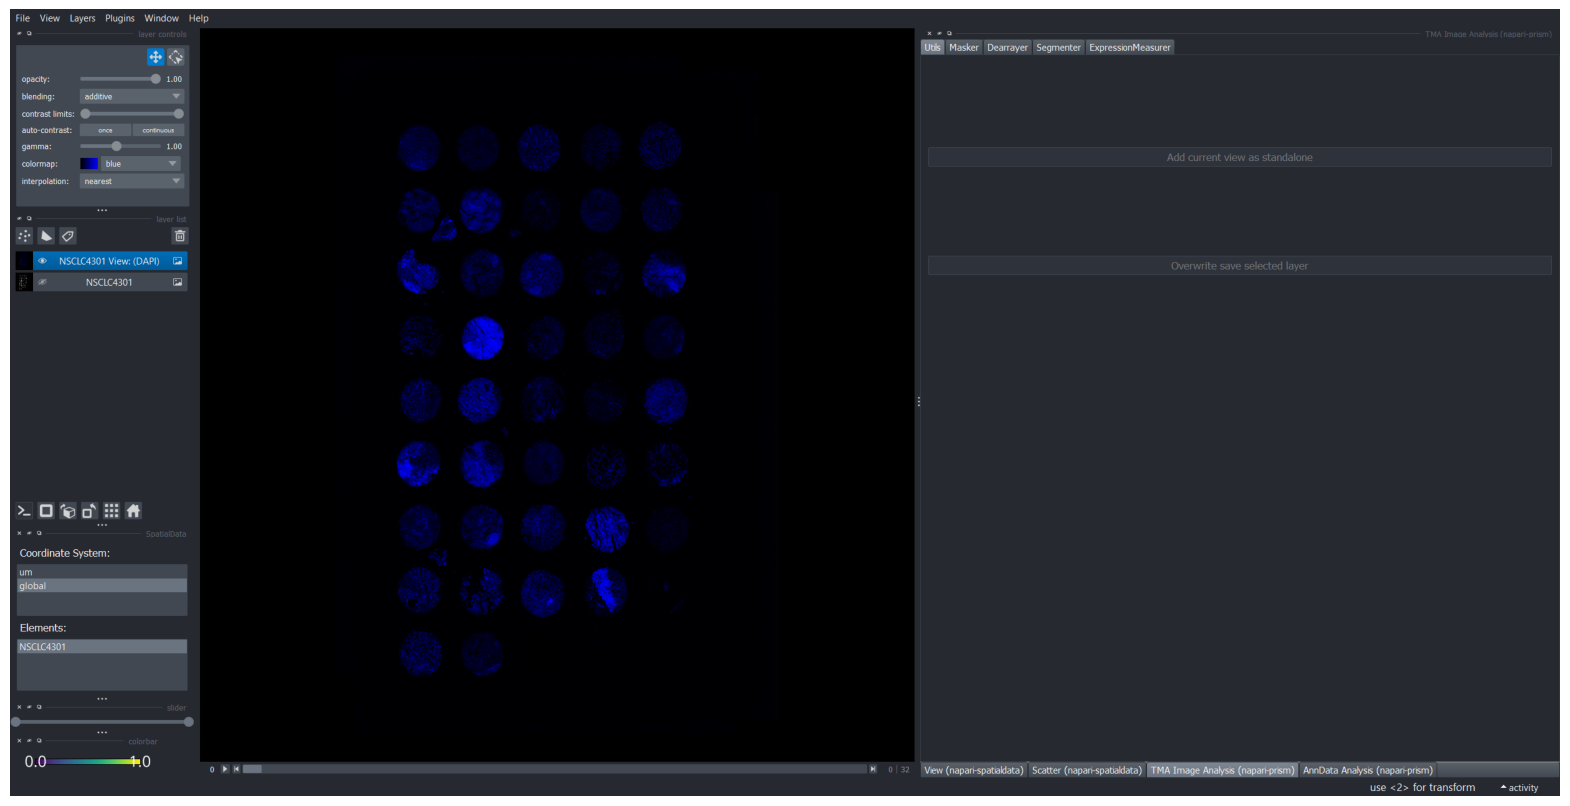

In [4]:
with ScreenshotContext():
    plt.imshow(viewer.screenshot(canvas_only=False))
    plt.axis("off")
    plt.show()

Then, E-cadherin as a green colormap:

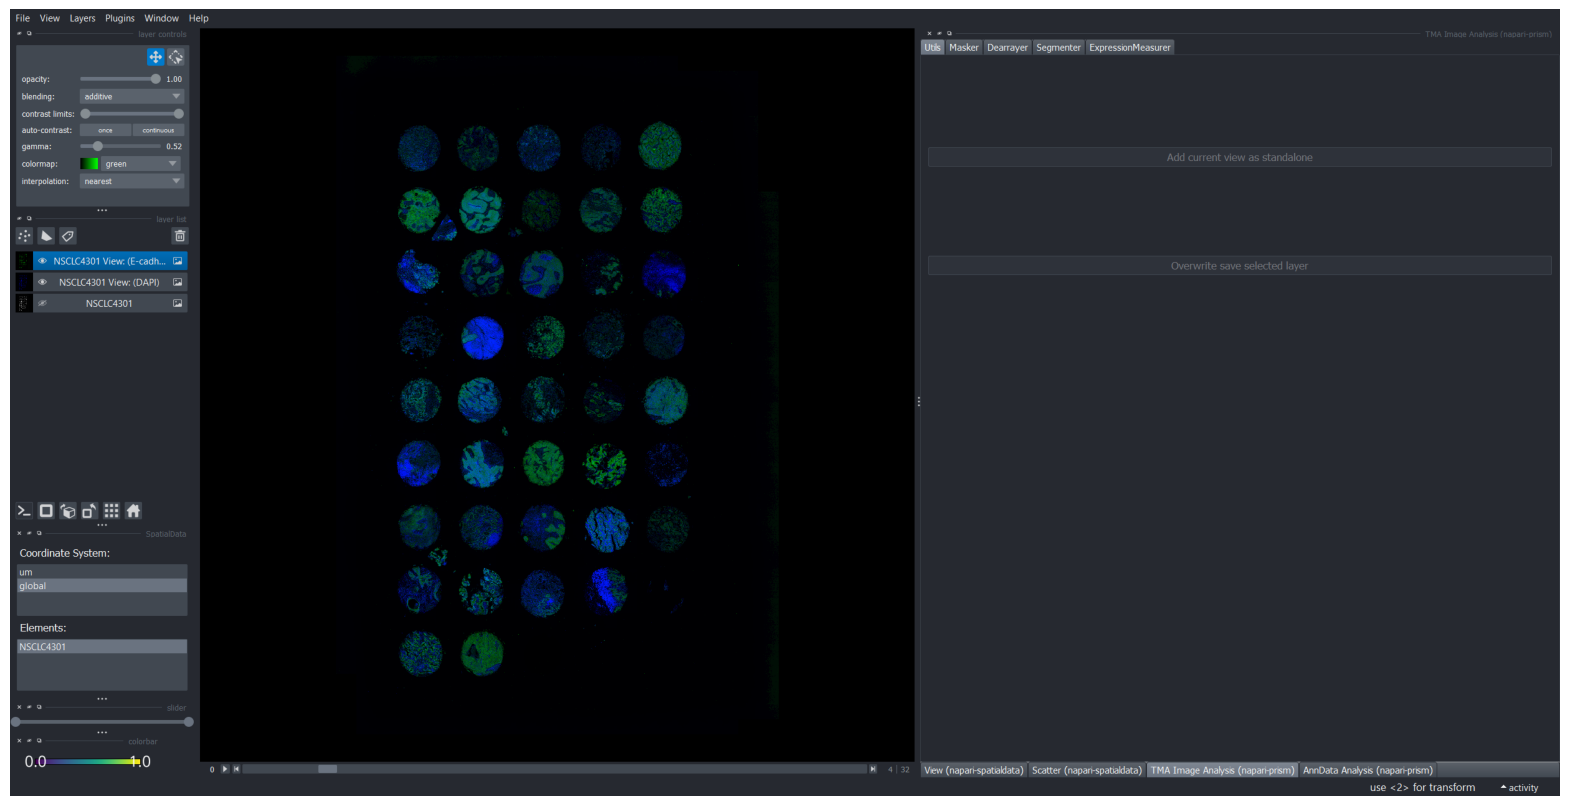

In [5]:
with ScreenshotContext():
    plt.imshow(viewer.screenshot(canvas_only=False))
    plt.axis("off")
    plt.show()

Then, CD68 as a magenta colormap:

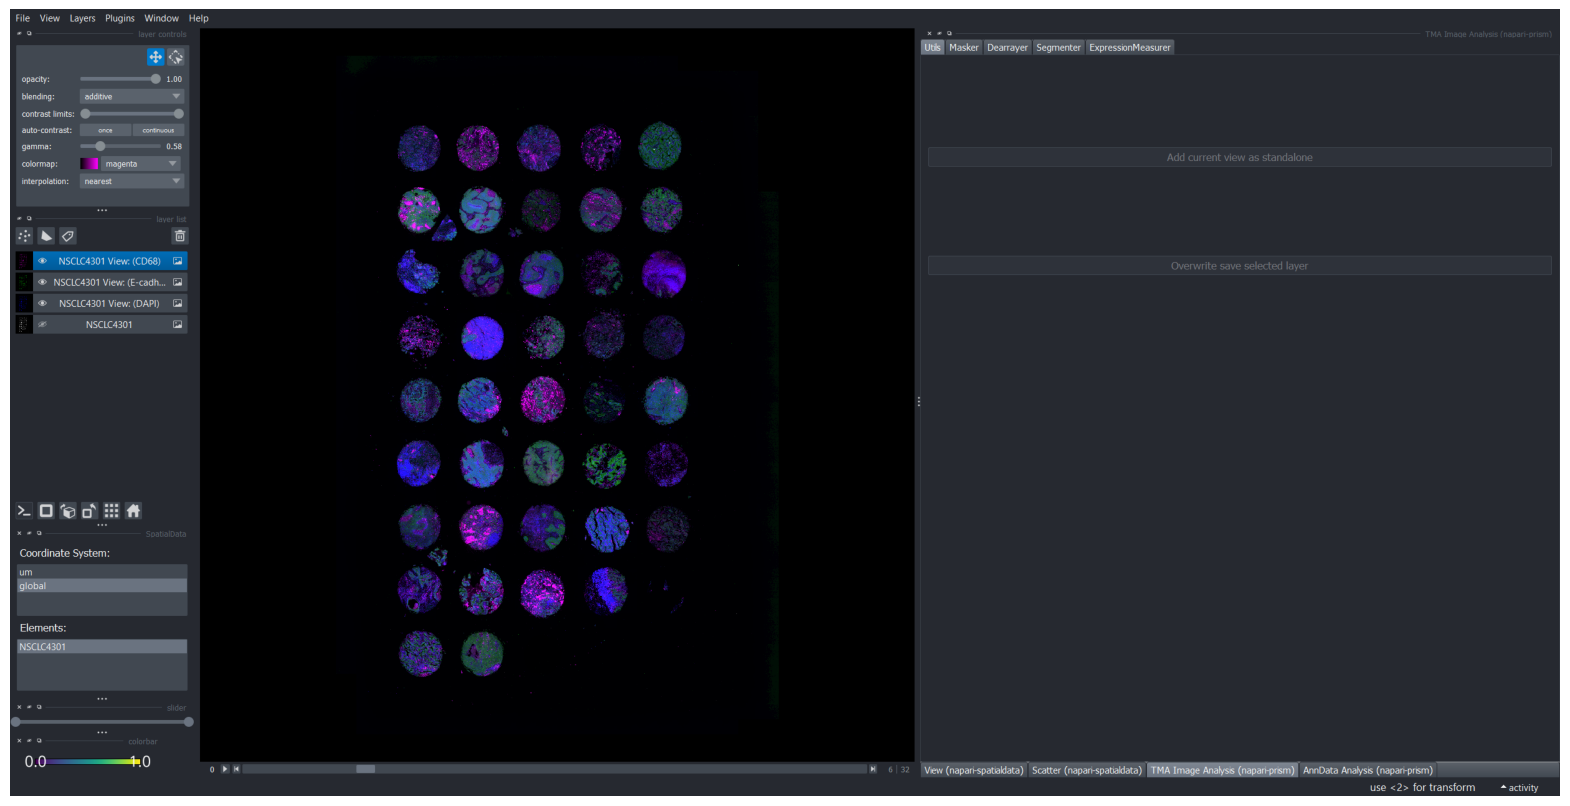

In [6]:
with ScreenshotContext():
    plt.imshow(viewer.screenshot(canvas_only=False))
    plt.axis("off")
    plt.show()

## Next Steps

- For more information on how to use the viewer widgets, please see the [original napari-spatialdata documentation](https://spatialdata.scverse.org/projects/napari/en/latest/notebooks/spatialdata.html).

- [See the next section to learn how to process and analyse the raw tissue microarray image](./tma_usage.ipynb).